In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Assuming 'data' is your dataset
age_distribution = df['Age'].describe()
print(age_distribution)

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [8]:
correlation = df.corr()['Spending Score (1-100)'].sort_values(ascending=False).index[1]
print(correlation)

CustomerID


<ipython-input-8-d108e3031999>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Spending Score (1-100)'].sort_values(ascending=False).index[1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

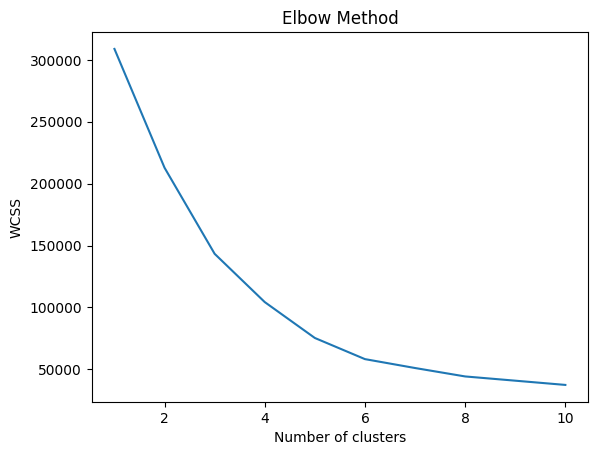

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# average income
average_income = df['Annual Income (k$)'].mean()
print(average_income)

60.56


In [17]:
# average spending
average_spending_male = df[df['Gender'] == 'Male']['Spending Score (1-100)'].mean()
print(average_spending_male)

48.51136363636363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


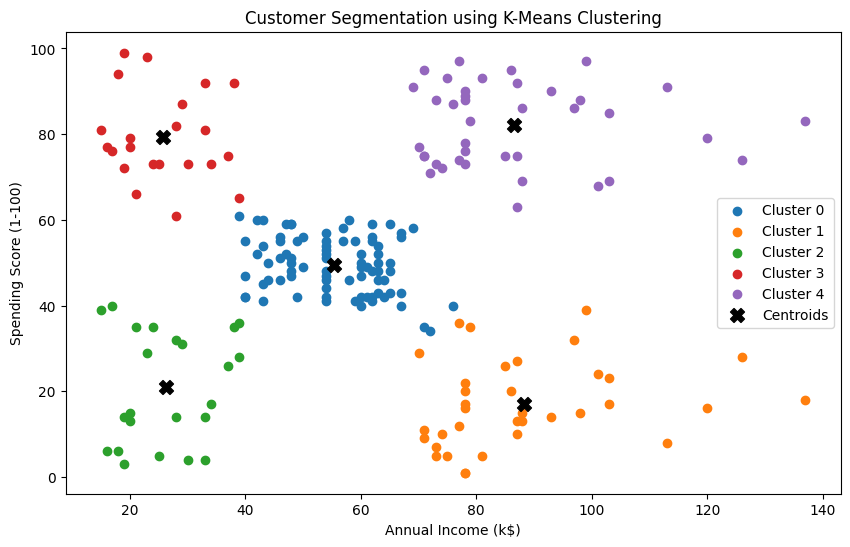

Final centroids:
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [19]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# number of clusters
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df["Cluster"] = kmeans.labels_

# Visualizethe clusters
plt.figure(figsize=(10, 6))
for cluster in range(K):
    plt.scatter(df.loc[df["Cluster"] == cluster, "Annual Income (k$)"],
                df.loc[df["Cluster"] == cluster, "Spending Score (1-100)"],
                label=f"Cluster {cluster}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color="black", marker="X", s=100, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend()
plt.show()

# Print
print("Final centroids:")
print(kmeans.cluster_centers_)


In [23]:
cluster_avg = df.groupby('Cluster').agg({'Annual Income (k$)':'mean', 'Spending Score (1-100)':'mean'})
highest_cluster = cluster_avg[(cluster_avg['Annual Income (k$)'] == cluster_avg['Annual Income (k$)'].max()) & (cluster_avg['Spending Score (1-100)'] == cluster_avg['Spending Score (1-100)'].max())]
print(highest_cluster)

Empty DataFrame
Columns: [Annual Income (k$), Spending Score (1-100)]
Index: []
